In [41]:
import pandas as pd
import os
import subprocess

In [62]:
vcf = 'TPMT.vcf'
df = pd.read_csv(vcf, sep='\t', comment='#',names = range(2557))
columns = ['CHROM', 'POS','ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT']
df.columns = (columns + list(range(df.shape[1]-len(columns))))

In [63]:
df.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,0,...,2538,2539,2540,2541,2542,2543,2544,2545,2546,2547
0,6,18128328,.,A,G,.,PASS,AC=1;AN=5096;DP=21739;AF=0;EAS_AF=0;EUR_AF=0;A...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
1,6,18128394,.,CA,C,.,PASS,AC=5;AN=5096;DP=22600;AF=0;EAS_AF=0;EUR_AF=0;A...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
2,6,18128428,.,T,A,.,PASS,AC=3888;AN=5096;DP=21563;AF=0.76;EAS_AF=0.77;E...,GT,1|1,...,0|0,0|1,1|0,1|1,0|1,0|0,0|1,1|1,1|0,1|0
3,6,18128444,.,G,C,.,PASS,AC=1;AN=5096;DP=21267;AF=0;EAS_AF=0;EUR_AF=0;A...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
4,6,18128445,.,A,G,.,PASS,AC=2;AN=5096;DP=21191;AF=0;EAS_AF=0;EUR_AF=0;A...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0


In [14]:
df.shape

(745, 2557)

In [15]:
# Extract AF values from the INFO column
df['AF'] = df['INFO'].str.extract(r'AF=([\d\.]+)').astype(float)

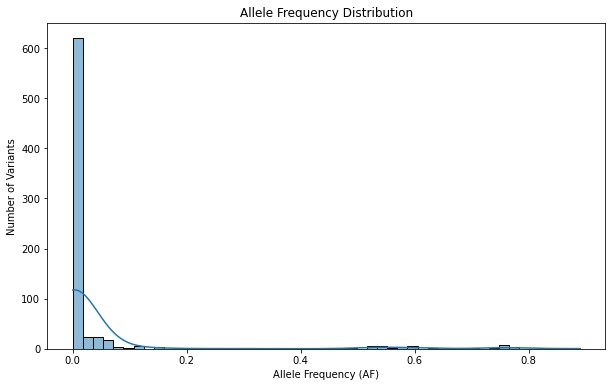

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['AF'].dropna(), bins=50, kde=True)
plt.title('Allele Frequency Distribution')
plt.xlabel('Allele Frequency (AF)')
plt.ylabel('Number of Variants')
plt.show()

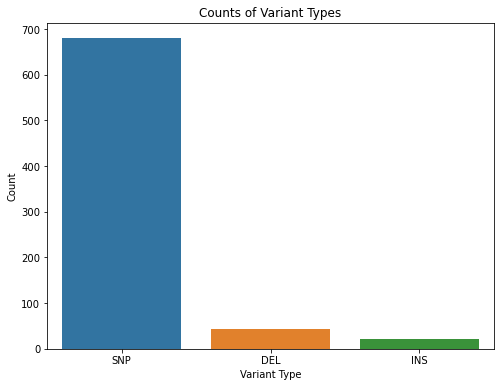

In [17]:
# Determine variant types based on REF and ALT lengths
df['Variant_Type'] = df.apply(lambda x: 'SNP' if len(x['REF']) == len(x['ALT']) == 1 else
                              'DEL' if len(x['REF']) > len(x['ALT']) else
                              'INS', axis=1)

# Plot the counts of each variant type
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Variant_Type', order=['SNP', 'DEL', 'INS'])
plt.title('Counts of Variant Types')
plt.xlabel('Variant Type')
plt.ylabel('Count')
plt.show()


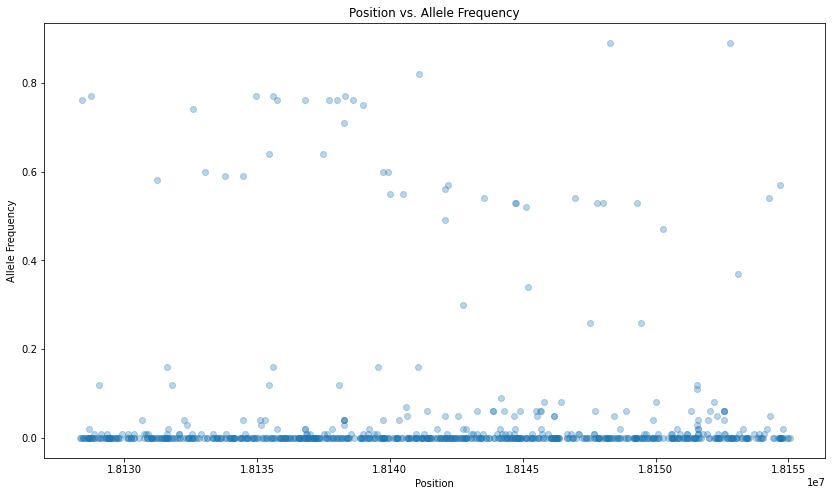

In [18]:
plt.figure(figsize=(14, 8))
plt.scatter(df['POS'], df['AF'], alpha=0.3)
plt.title('Position vs. Allele Frequency')
plt.xlabel('Position')
plt.ylabel('Allele Frequency')
plt.show()

# From Here

In [46]:
# in local
vcf = 'TPMT.vcf'
df = pd.read_csv(vcf, sep='\t', comment='#',names = range(2557))
columns = ['CHROM', 'POS','ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT']

In [47]:
df.columns = (columns + sample_names)

In [49]:
df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,HG00096,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,6,18128328,.,A,G,.,PASS,AC=1;AN=5096;DP=21739;AF=0;EAS_AF=0;EUR_AF=0;A...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
1,6,18128394,.,CA,C,.,PASS,AC=5;AN=5096;DP=22600;AF=0;EAS_AF=0;EUR_AF=0;A...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
2,6,18128428,.,T,A,.,PASS,AC=3888;AN=5096;DP=21563;AF=0.76;EAS_AF=0.77;E...,GT,1|1,...,0|0,0|1,1|0,1|1,0|1,0|0,0|1,1|1,1|0,1|0
3,6,18128444,.,G,C,.,PASS,AC=1;AN=5096;DP=21267;AF=0;EAS_AF=0;EUR_AF=0;A...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
4,6,18128445,.,A,G,.,PASS,AC=2;AN=5096;DP=21191;AF=0;EAS_AF=0;EUR_AF=0;A...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,6,18154782,.,A,G,.,PASS,AC=1;AN=5096;DP=18368;AF=0;EAS_AF=0;EUR_AF=0;A...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
741,6,18154799,.,T,G,.,PASS,AC=86;AN=5096;DP=18061;AF=0.02;EAS_AF=0;EUR_AF...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
742,6,18154951,.,T,A,.,PASS,AC=4;AN=5096;DP=15393;AF=0;EAS_AF=0;EUR_AF=0;A...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
743,6,18154987,.,A,C,.,PASS,AC=4;AN=5096;DP=15032;AF=0;EAS_AF=0;EUR_AF=0;A...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0


In [50]:
df_TPMT = pd.read_excel('TPMT_allele_definition_table.xlsx')

/Users/cathyyang/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [51]:
columns = ['Gene:TPMT']
for i in df_TPMT.iloc[2][1:]:
    position = i[2:10]
    columns.append(position)

In [52]:
df_TPMT.columns = columns

In [53]:
df_TPMT1 = df_TPMT.iloc[6:].reset_index(drop = True)

In [54]:
for col in df_TPMT1.columns:
    df_TPMT1[col].fillna(df_TPMT1[col].iloc[0], inplace=True)

In [55]:
df_TPMT1.head()

,Gene:TPMT,18130687,18130694,18130725,18130729,18130758,18130762,18130772,18130781,18132136,...,18147845,18147851,18147856,18147910,18149004,18149022,18149032,18149045,18149126,18149127
0,*1,T,T,A,C,A,C,A,C,A,...,C,G,A,A,G,C,del,T,A,T
1,*2,T,T,A,C,A,C,A,C,A,...,C,G,A,A,G,C,del,T,A,T
2,*3A,C,T,A,C,A,C,A,C,A,...,C,G,A,A,G,C,del,T,A,T
3,*3B,T,T,A,C,A,C,A,C,A,...,C,G,A,A,G,C,del,T,A,T
4,*3C,C,T,A,C,A,C,A,C,A,...,C,G,A,A,G,C,del,T,A,T


In [56]:
TPMT_positions = list(df_TPMT1.columns[1:])
TPMT_positions = [int(item) for item in TPMT_positions]

In [57]:
sample_positions = list(df['POS'])

In [58]:
len(TPMT_positions)

43

In [59]:
len(sample_positions)

745

In [60]:
len(set(TPMT_positions) & set(sample_positions))

12

In [61]:
shared_positions = sorted(list(set(TPMT_positions) & set(sample_positions)))

In [62]:
shared_positions

[18130687,
 18130729,
 18130762,
 18133845,
 18133847,
 18138969,
 18138970,
 18138997,
 18139710,
 18143622,
 18143724,
 18147851]

In [63]:
df_working = pd.DataFrame(columns = df.columns)
for position in shared_positions:
    df_temp = df[df['POS'] == position]
    df_working = pd.concat([df_working,df_temp])

In [64]:
df_working = df_working.sort_values(by = 'POS').reset_index(drop = True)

In [65]:
df_working.shape

(12, 2557)

In [66]:
df_working

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,HG00096,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,6,18130687,.,T,C,.,PASS,AC=197;AN=5096;DP=324876;AF=0.04;EAS_AF=0.02;E...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
1,6,18130729,.,C,T,.,PASS,AC=1;AN=5096;DP=370753;AF=0;EAS_AF=0;EUR_AF=0;...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
2,6,18130762,.,C,T,.,PASS,AC=29;AN=5096;DP=336921;AF=0.01;EAS_AF=0;EUR_A...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
3,6,18133845,.,T,A,.,PASS,AC=1;AN=5096;DP=275715;AF=0;EAS_AF=0;EUR_AF=0;...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
4,6,18133847,.,C,A,.,PASS,AC=38;AN=5096;DP=276303;AF=0.01;EAS_AF=0;EUR_A...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
5,6,18138969,.,C,T,.,PASS,AC=2;AN=5096;DP=313072;AF=0;EAS_AF=0;EUR_AF=0;...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
6,6,18138970,.,G,A,.,PASS,AC=3;AN=5096;DP=318644;AF=0;EAS_AF=0;EUR_AF=0;...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
7,6,18138997,.,C,T,.,PASS,AC=65;AN=5096;DP=376434;AF=0.01;EAS_AF=0;EUR_A...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
8,6,18139710,.,G,A,.,PASS,AC=1;AN=5096;DP=207395;AF=0;EAS_AF=0;EUR_AF=0;...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
9,6,18143622,.,C,T,.,PASS,AC=1;AN=5096;DP=300780;AF=0;EAS_AF=0;EUR_AF=0;...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0


In [67]:
df_TPMT_working = df_TPMT1[['Gene:TPMT']+[str(i) for i in shared_positions]]

In [68]:
df_TPMT_working.head()

,Gene:TPMT,18130687,18130729,18130762,18133845,18133847,18138969,18138970,18138997,18139710,18143622,18143724,18147851
0,*1,T,C,C,T,C,C,G,C,G,C,C,G
1,*2,T,C,C,T,C,C,G,C,G,C,G,G
2,*3A,C,C,C,T,C,C,G,T,G,C,C,G
3,*3B,T,C,C,T,C,C,G,T,G,C,C,G
4,*3C,C,C,C,T,C,C,G,C,G,C,C,G


In [69]:
def construct_sample_row_12(df_working,sample):
    df_temp = df_working[['REF','ALT',sample]]
    sample_name1 = str(sample)+'_1'
    sample_row1 = []
    sample_row1.append(sample_name1)
    sample_name2 = str(sample)+'_2'
    sample_row2 = []
    sample_row2.append(sample_name2)
    for _,row in df_temp.iterrows():
        first_GT = row[sample][0]
        second_GT = row[sample][-1]
        first_GT_name = row['REF']
        second_GT_name = row['REF']
        if first_GT == '1':
            first_GT_name = row['ALT']
        if second_GT == '1':
            second_GT_name = row['ALT']
        sample_row1.append(first_GT_name)
        sample_row2.append(second_GT_name)
    return(sample_row1,sample_row2)

In [70]:
df_sample = pd.DataFrame(columns = df_TPMT_working.columns)
for i in range(9,len(df_working.columns)):
    sample = df_working.columns[i]
    sample_row1,sample_row2 = construct_sample_row_12(df_working,sample)
    df_sample.loc[len(df_sample)] = sample_row1
    df_sample.loc[len(df_sample)] = sample_row2

In [71]:
df_sample.rename(columns={"Gene:TPMT": "sample_name"},inplace = True)
df_sample = df_sample.set_index('sample_name')

In [72]:
df_TPMT_working = df_TPMT_working.rename(columns={"Gene:TPMT": "star_name"})
df_TPMT_working = df_TPMT_working.set_index('star_name')

In [73]:
df_sample.head()

,18130687,18130729,18130762,18133845,18133847,18138969,18138970,18138997,18139710,18143622,18143724,18147851
sample_name,,,,,,,,,,,,
HG00096_1,T,C,C,T,C,C,G,C,G,C,C,G
HG00096_2,T,C,C,T,C,C,G,C,G,C,C,G
HG00097_1,T,C,C,T,C,C,G,C,G,C,C,G
HG00097_2,T,C,C,T,C,C,G,C,G,C,C,G
HG00099_1,T,C,C,T,C,C,G,C,G,C,C,G


In [74]:
df_TPMT_working.head()

,18130687,18130729,18130762,18133845,18133847,18138969,18138970,18138997,18139710,18143622,18143724,18147851
star_name,,,,,,,,,,,,
*1,T,C,C,T,C,C,G,C,G,C,C,G
*2,T,C,C,T,C,C,G,C,G,C,G,G
*3A,C,C,C,T,C,C,G,T,G,C,C,G
*3B,T,C,C,T,C,C,G,T,G,C,C,G
*3C,C,C,C,T,C,C,G,C,G,C,C,G


In [75]:
df_TPMT_working_no_dup = df_TPMT_working.drop_duplicates(keep = 'first')

In [76]:
df_TPMT_working_no_dup

,18130687,18130729,18130762,18133845,18133847,18138969,18138970,18138997,18139710,18143622,18143724,18147851
star_name,,,,,,,,,,,,
*1,T,C,C,T,C,C,G,C,G,C,C,G
*2,T,C,C,T,C,C,G,C,G,C,G,G
*3A,C,C,C,T,C,C,G,T,G,C,C,G
*3B,T,C,C,T,C,C,G,T,G,C,C,G
*3C,C,C,C,T,C,C,G,C,G,C,C,G
*6,T,C,C,A,C,C,G,C,G,C,C,G
*8,T,C,T,T,C,C,G,C,G,C,C,G
*12,T,C,C,T,C,C,G,C,A,C,C,G
*16,T,C,C,T,C,T,G,C,G,C,C,G


In [77]:
# Exclude index columns for comparison
df_sample_no_index = df_sample.reset_index(drop=False)
df_TPMT_working_no_index = df_TPMT_working_no_dup.reset_index(drop=False)
# Create an empty list to store the results
matches = []
for i, row_sample in df_sample_no_index.iterrows():
    # For each sample row, compare it with each row in df_TPMT_working_no_dup
    for j, row_star in df_TPMT_working_no_index.iterrows():
        # Check if the rows match (excluding 'sample_name' and 'star_name' columns)
        if row_sample.iloc[1:].equals(row_star.iloc[1:]):
            matches.append({'sample_name': row_sample['sample_name'], 'star_name': row_star['star_name']})
            break
df_matches = pd.DataFrame(matches)

In [78]:
df_matches.groupby('star_name').size()

star_name
*1     4813
*12       1
*16       2
*2       11
*21       1
*24      38
*32       1
*33       1
*3A      65
*3C     132
*40       1
*6        1
*8       27
dtype: int64

In [79]:
df_matches

,sample_name,star_name
0,HG00096_1,*1
1,HG00096_2,*1
2,HG00097_1,*1
3,HG00097_2,*1
4,HG00099_1,*1
...,...,...
5089,NA21142_2,*1
5090,NA21143_1,*1
5091,NA21143_2,*1
5092,NA21144_1,*1


In [84]:
df_matches = df_matches.set_index('sample_name')

In [110]:
ls_star = []
ls_sample_name = []
for i in sample_names:
    if i+'_1' in df_matches.index:
        ls_sample_name.append(i)
        star1 = df_matches.loc[i+'_1','star_name']
        star2 = df_matches.loc[i+'_2','star_name']
        if int(star1[1]) <= int(star2[1]):
            star = star1+'/'+star2
        else:
            star = star2+'/'+star1
        ls_star.append(star)

In [111]:
df_result = pd.DataFrame({'sample_name':ls_sample_name,'genotype':ls_star})

In [113]:
df_result.groupby('genotype').size()

genotype
*1/*1      2279
*1/*12        1
*1/*16        1
*1/*2        10
*1/*21        1
*1/*24       36
*1/*32        1
*1/*33        1
*1/*3A       60
*1/*3C      115
*1/*40        1
*1/*6         1
*1/*8        25
*16/*3A       1
*2/*3A        1
*24/*3C       2
*3A/*3A       1
*3C/*3A       1
*3C/*3C       6
*3C/*8        2
dtype: int64

In [115]:
df_TPMT_pheno = pd.read_excel('TPMT_Diplotype_Phenotype_Table.xlsx')

/Users/cathyyang/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [118]:
df_TPMT_pheno.head()

,TPMT Diplotype,Activity Score,Coded Diplotype/Phenotype Summary,EHR Priority Notation
0,*1/*1,NaN,TPMT Normal Metabolizer,Normal/Routine/Low Risk
1,*1/*2,NaN,TPMT Intermediate Metabolizer,Abnormal/Priority/High Risk
2,*1/*3A,NaN,TPMT Intermediate Metabolizer,Abnormal/Priority/High Risk
3,*1/*3B,NaN,TPMT Intermediate Metabolizer,Abnormal/Priority/High Risk
4,*1/*3C,NaN,TPMT Intermediate Metabolizer,Abnormal/Priority/High Risk


In [119]:
df_result.head()

,sample_name,genotype
0,HG00096,*1/*1
1,HG00097,*1/*1
2,HG00099,*1/*1
3,HG00100,*1/*1
4,HG00101,*1/*1


In [120]:
df_result_pheno = pd.merge(df_result,df_TPMT_pheno,left_on = 'genotype',right_on = 'TPMT Diplotype',how = 'left')

In [124]:
df_result_pheno

,sample_name,genotype,TPMT Diplotype,Activity Score,Coded Diplotype/Phenotype Summary,EHR Priority Notation
0,HG00096,*1/*1,*1/*1,NaN,TPMT Normal Metabolizer,Normal/Routine/Low Risk
1,HG00097,*1/*1,*1/*1,NaN,TPMT Normal Metabolizer,Normal/Routine/Low Risk
2,HG00099,*1/*1,*1/*1,NaN,TPMT Normal Metabolizer,Normal/Routine/Low Risk
3,HG00100,*1/*1,*1/*1,NaN,TPMT Normal Metabolizer,Normal/Routine/Low Risk
4,HG00101,*1/*1,*1/*1,NaN,TPMT Normal Metabolizer,Normal/Routine/Low Risk
...,...,...,...,...,...,...
2541,NA21137,*1/*1,*1/*1,NaN,TPMT Normal Metabolizer,Normal/Routine/Low Risk
2542,NA21141,*1/*1,*1/*1,NaN,TPMT Normal Metabolizer,Normal/Routine/Low Risk
2543,NA21142,*1/*1,*1/*1,NaN,TPMT Normal Metabolizer,Normal/Routine/Low Risk
2544,NA21143,*1/*1,*1/*1,NaN,TPMT Normal Metabolizer,Normal/Routine/Low Risk


In [123]:
df_result_pheno.groupby('Coded Diplotype/Phenotype Summary').size()

Coded Diplotype/Phenotype Summary
TPMT Indeterminate                          68
TPMT Intermediate Metabolizer              185
TPMT Normal Metabolizer                   2279
TPMT Poor Metabolizer                        8
TPMT Possible Intermediate Metabolizer       2
dtype: int64